In [6]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_excel('../Dataset/Donations to national political parties - India.xlsx')

In [8]:
df.head()

,Party,Name,Type,Address,PAN Given,Amount,Contribution Mode,Financial Year,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,CPI,Aziz Pasha,Others,"16-B, Ferozeshah Road New Delhi-1",Y,3000000,CASH,2010-11,NaN,NaN,NaN,NaN,NaN,NaN
1,CPI(M),V K Ramachandran,Others,"No.1, First Floor Main Road Domlur Second Stag...",Y,10000000,"000037, HDFC Bank Bengaluru, Dt. 16.03.2015, 5...",2014-15,NaN,NaN,NaN,NaN,NaN,NaN
2,INC,Dr. Manmohan Singh,Others,"3, Motilal Nehru Place New Delhi",N,108000,"Cheque, State Bank of India Parliament House N...",2014-15,NaN,NaN,NaN,NaN,NaN,NaN
3,INC,Dr. Manda Jagnathan,Others,"9,Firozshah Road New Delhi",N,54000,Through Bank Transfer,2011-12,NaN,NaN,NaN,NaN,NaN,NaN
4,INC,Prof. K.V.Thomas,Others,"17,Dr.B.R.Mehta Lane New Delhi",N,54000,Through Bank Transfer,2011-12,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df = df.loc[:, :'Financial Year ']
df.columns = ['party', 'donator', 'type', 'address', 'pan_given', 'amount', 'contribution_mode', 'financial_year']

In [10]:
df.head()

,party,donator,type,address,pan_given,amount,contribution_mode,financial_year
0,CPI,Aziz Pasha,Others,"16-B, Ferozeshah Road New Delhi-1",Y,3000000,CASH,2010-11
1,CPI(M),V K Ramachandran,Others,"No.1, First Floor Main Road Domlur Second Stag...",Y,10000000,"000037, HDFC Bank Bengaluru, Dt. 16.03.2015, 5...",2014-15
2,INC,Dr. Manmohan Singh,Others,"3, Motilal Nehru Place New Delhi",N,108000,"Cheque, State Bank of India Parliament House N...",2014-15
3,INC,Dr. Manda Jagnathan,Others,"9,Firozshah Road New Delhi",N,54000,Through Bank Transfer,2011-12
4,INC,Prof. K.V.Thomas,Others,"17,Dr.B.R.Mehta Lane New Delhi",N,54000,Through Bank Transfer,2011-12


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13573 entries, 0 to 13572
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              13573 non-null  object
 1   donator            13528 non-null  object
 2   type               13573 non-null  object
 3   address            13573 non-null  object
 4   pan_given          13573 non-null  object
 5   amount             13573 non-null  int64 
 6   contribution_mode  13339 non-null  object
 7   financial_year     13573 non-null  object
dtypes: int64(1), object(7)
memory usage: 848.4+ KB


In [12]:
df.describe(include=['O'])

,party,donator,type,address,pan_given,contribution_mode,financial_year
count,13573,13528,13573,13573,13573,13339,13573
unique,5,10923,2,7280,2,10403,12
top,BJP,General Electoral Trust,Others,--,N,Cash,2012-13
freq,8782,64,13442,3155,8329,584,3776


In [13]:
df.describe()

,amount
count,1.357300e+04
mean,1.045728e+06
std,8.780605e+06
min,1.875000e+03
25%,3.200000e+04
50%,6.000000e+04
75%,2.000000e+05
max,5.000000e+08


In [14]:
df.isnull().sum()

party                  0
donator               45
type                   0
address                0
pan_given              0
amount                 0
contribution_mode    234
financial_year         0
dtype: int64

In [15]:
df.nunique()

party                    5
donator              10923
type                     2
address               7280
pan_given                2
amount                 682
contribution_mode    10403
financial_year          12
dtype: int64

In [16]:
df.party.unique()

array(['CPI', 'CPI(M)', 'INC', 'BJP', 'NCP'], dtype=object)

In [17]:
df.columns

Index(['party', 'donator', 'type', 'address', 'pan_given', 'amount',
       'contribution_mode', 'financial_year'],
      dtype='object')

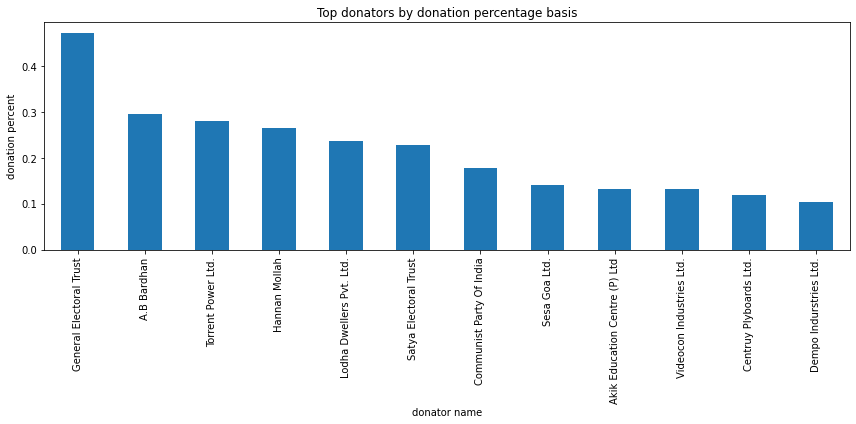

In [18]:
tmp = (df.donator.value_counts()*100/df.shape[0])
tmp[tmp>=0.1].plot(kind='bar', figsize=(12,6), ylabel='donation percent', xlabel='donator name', title='Top donators by donation percentage basis')
plt.tight_layout()

In [19]:
df.type.unique()

array(['Others', 'Electoral Trust'], dtype=object)

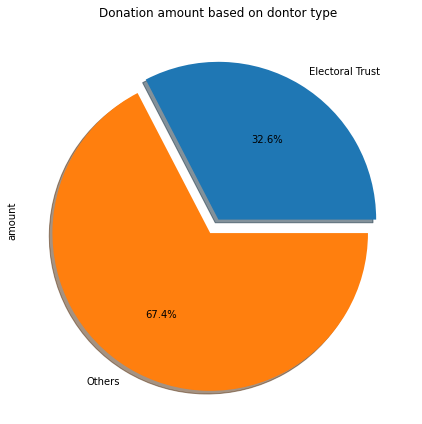

In [20]:
df.groupby('type')['amount'].sum().plot(kind='pie',title="Donation amount based on dontor type", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0.1), \
                   shadow=True, startangle=0, figsize=(6,6))
plt.tight_layout()

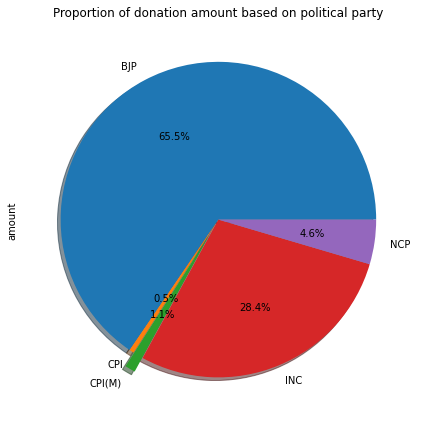

In [21]:
df.groupby('party')['amount'].sum().plot(kind='pie',title="Proportion of donation amount based on political party", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1, 0, 0), \
                   shadow=True, startangle=0, figsize=(6,6))
plt.tight_layout()

### How many donator's has given pan card?

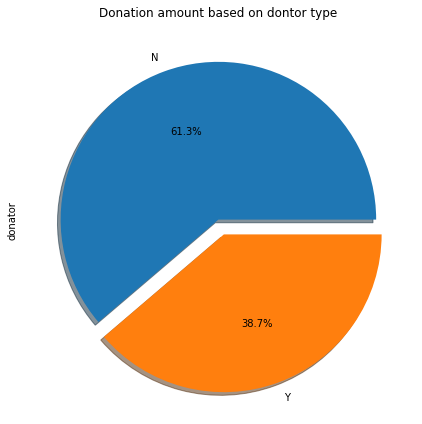

In [22]:
df.groupby('pan_given')['donator'].count().plot(kind='pie',title="Donation amount based on dontor type", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0.1), \
                   shadow=True, startangle=0, figsize=(6,6))
plt.tight_layout()

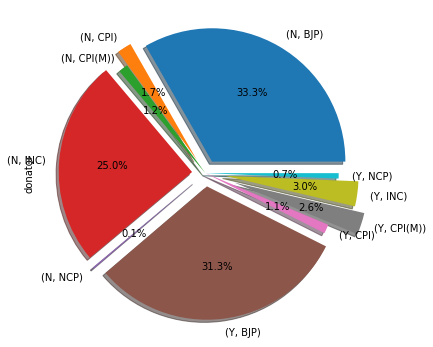

In [28]:
df.groupby(['pan_given', 'party'])['donator'].count().plot(kind='pie', autopct='%1.1f%%', \
                                                          explode=(0.1,0.12,0,0.1,0.1,0.1,0,0.23,0.15,0),\
                                                          figsize=(6,6), shadow=True)
plt.tight_layout()

In [24]:
df.loc[df['contribution_mode'].str.contains(r'[a-zA-Z0-9]*([Bb][Aa]+[Nn]+[Kk]|Bnak)', na=False), 'contribution_mode'] = 'Bank Transfer'
df.loc[df['contribution_mode'].str.contains(r'[a-zA-Z0-9]*[Cc][Aa][Ss][Hh]', na=False), 'contribution_mode'] = 'Cash'
df.loc[df['contribution_mode'].str.contains(r'[a-zA-Z0-9]*[Rr][Tt][Gg][Ss]*', na=False), 'contribution_mode'] = 'RTGS'
df.loc[df['contribution_mode'].str.contains(r'[a-zA-Z0-9]*([Cc][Hh][Ee][Qq][Uu][Ee]|Ch..*No.)', na=False), 'contribution_mode'] = 'Cheque'
df.loc[df['contribution_mode'].str.contains(r'[a-zA-Z0-9]*([Ss][Bb][Ii]|[Ii][Dd][Bb][Ii]|[Hh][Dd][Ff][Cc]|ICICI|PNB|BOB|IOB|OBC|SIB|BOI|UBI|CO.OP)', na=False), 'contribution_mode'] = 'Bank Transfer'
df.loc[df['contribution_mode'].str.contains(r'[a-zA-Z0-9]*(DD|D/D|Demand)', na=False), 'contribution_mode'] = 'DD'
df.loc[df['contribution_mode'].str.contains(r'[a-zA-Z0-9]*([Oo]+[Nn]+[Ll]+[Ii]+[Nn]+[Ee]+|Transfer)', na=False), 'contribution_mode'] = 'Bank Transfer'
df.loc[df['contribution_mode'].str.contains(r'[a-zA-Z0-9]*(NEFT)', na=False), 'contribution_mode'] = 'NEFT'

df.contribution_mode.nunique()

C:\Users\visha\AppData\Local\Temp\ipykernel_7000\778104831.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['contribution_mode'].str.contains(r'[a-zA-Z0-9]*([Bb][Aa]+[Nn]+[Kk]|Bnak)', na=False), 'contribution_mode'] = 'Bank Transfer'
C:\Users\visha\AppData\Local\Temp\ipykernel_7000\778104831.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['contribution_mode'].str.contains(r'[a-zA-Z0-9]*([Cc][Hh][Ee][Qq][Uu][Ee]|Ch..*No.)', na=False), 'contribution_mode'] = 'Cheque'
C:\Users\visha\AppData\Local\Temp\ipykernel_7000\778104831.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['contribution_mode'].str.contains(r'[a-zA-Z0-9]*([Ss][Bb][Ii]|[Ii][Dd][Bb][Ii]|[Hh][Dd][Ff][Cc]|ICICI|PNB|BOB|IOB|O

649

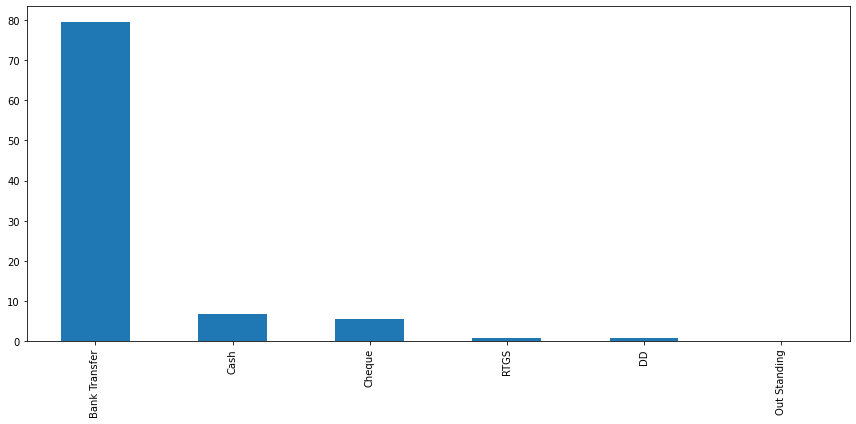

In [25]:
tmp = (df.contribution_mode.value_counts()*100/df.shape[0])
tmp[tmp>0.1].plot(kind='bar', figsize=(12,6))
plt.tight_layout()

In [26]:
df.financial_year.value_counts()

2012-13    3776
2013-14    2361
2014-15    1695
2011-12    1588
2010-11    1062
2009-10     594
2005-06     518
2004-05     500
2003-04     483
2007-08     390
2008-09     362
2006-07     244
Name: financial_year, dtype: int64

<AxesSubplot:xlabel='financial_year', ylabel='amount'>

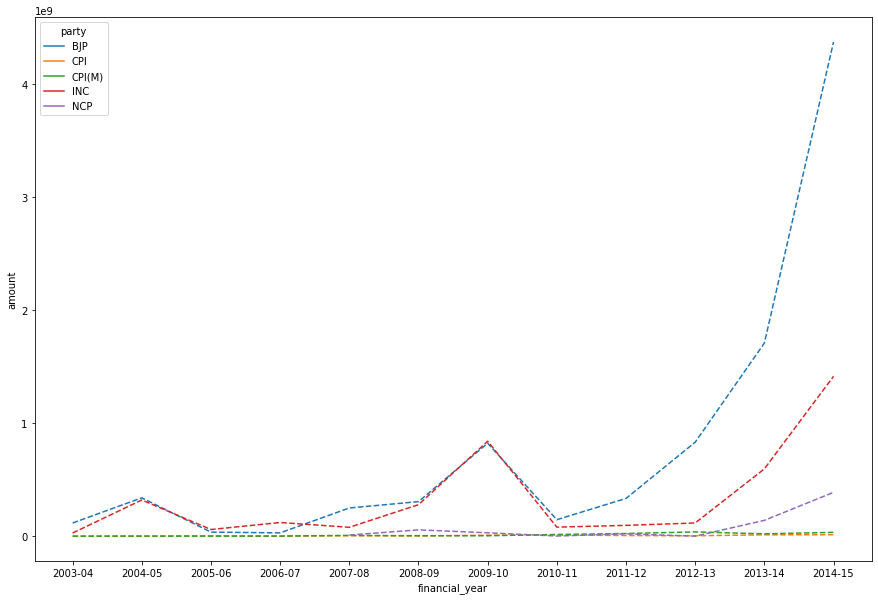

In [27]:
tmp = df.groupby(['financial_year', 'party'])['amount'].sum().reset_index()
fig = plt.figure(figsize=(15,10))
sns.lineplot(data=tmp, x='financial_year', y='amount', hue='party', ls='--', markers=True)